# CNN 

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Conv2D, Dropout , BatchNormalization
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator, load_img

### Neural Networks 


Building cnn model

In [10]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',padding='same',input_shape = (150,150,3)))
model.add(Conv2D(32,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D())

#Layers
model.add(Conv2D(32,(3,3),activation='relu',padding='same'))
model.add(Conv2D(32,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D())

#layers
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D())

#output
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
             optimizer ='adam',
             metrics=['accuracy'])


In [11]:
# augments image by iteratting through image 
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2,
                                   zoom_range = 0.2, 
                                   brightness_range = [0.9, 1],
                                  validation_split = 0.1,
                                  rotation_range = 15,
                                  width_shift_range = .1,
                                  height_shift_range = .1,
                                   
                                   
                            )

test_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
train_dir = r'C:\Users\tonym\Documents\Flatiron\phase_4\project_data\train'
test_dir = r'C:\Users\tonym\Documents\Flatiron\phase_4\project_data\test'
val_dir = r'C:\Users\tonym\Documents\Flatiron\phase_4\project_data\train'

In [13]:
#load data set 
training_set = train_datagen.flow_from_directory(train_dir, 
                                                target_size = (150,150),
                                                batch_size = 16,
                                                subset = 'training',
                                                seed = 42,
                                                class_mode = 'binary'
                                                )
validation_gen = train_datagen.flow_from_directory(val_dir, 
                                                target_size = (150,150),
                                                batch_size = 16,
                                                subset = 'validation',
                                                seed = 42,
                                                class_mode = 'binary'
                                                )
test_set = train_datagen.flow_from_directory(test_dir, 
                                                target_size = (150,150),
                                                batch_size = 16,
                                                seed = 42,
                                                class_mode = 'binary'
                                                )


Found 4695 images belonging to 2 classes.
Found 521 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [14]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 150, 150, 32)      896       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 150, 150, 32)      9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 75, 75, 32)        9248      
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 75, 75, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 37, 37, 64)       

In [15]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)

In [16]:
model5 = model.fit(training_set,
                             steps_per_epoch=4695//32,
                             epochs =10,
                             validation_data = validation_gen,
                             validation_steps= 521//32,
                             callbacks=[early_stopping])


Epoch 1/10
146/146 [==============================] - 93s 638ms/step - loss: 0.4610 - accuracy: 0.7851 - val_loss: 0.3447 - val_accuracy: 0.8320
Epoch 2/10
146/146 [==============================] - 92s 629ms/step - loss: 0.3277 - accuracy: 0.8621 - val_loss: 0.3332 - val_accuracy: 0.8242
Epoch 3/10
146/146 [==============================] - 78s 535ms/step - loss: 0.2820 - accuracy: 0.8827 - val_loss: 0.3490 - val_accuracy: 0.8438
Epoch 4/10
146/146 [==============================] - 77s 527ms/step - loss: 0.2706 - accuracy: 0.8926 - val_loss: 0.2521 - val_accuracy: 0.8867
Epoch 5/10
146/146 [==============================] - 77s 525ms/step - loss: 0.2369 - accuracy: 0.9055 - val_loss: 0.2779 - val_accuracy: 0.8555
Epoch 6/10
146/146 [==============================] - 77s 526ms/step - loss: 0.2440 - accuracy: 0.8943 - val_loss: 0.2809 - val_accuracy: 0.8867
Epoch 00006: early stopping


In [17]:
# checking accuracy 
test_acc = model.evaluate(test_set,steps = 1)


39/39 [==============================] - 9s 221ms/step - loss: 0.6451 - accuracy: 0.7500


In [18]:
#accuracy 
print('test acc is:', test_acc[1] * 100, '%')

test acc is: 75.0 %


#### Baseline confusion matrix 

### Accuracy Baseline Plot 

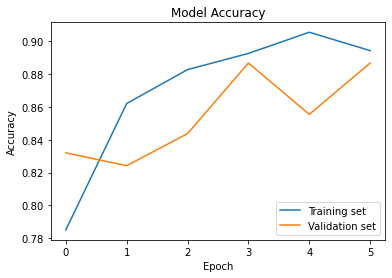

In [20]:
plt.plot(model5.history['accuracy'])
plt.plot(model5.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='lower right')
plt.show()

### Loss Baseline Plot 

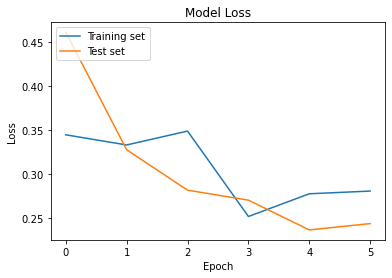

In [21]:
plt.plot(model5.history['val_loss'])
plt.plot(model5.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Test set'], loc='upper left')
plt.show()